### Q1) 입력한 단어의 모음 개수(A,E,I,O,U,a,e,i,o,u) 찾기
- 키보드로 단어를 입력받아 모음의 개수를 출력하는 코드를 작성하세요.
    - 키보드 입력 : HeLLO
    - 결과출력 : 2개

In [1]:
a = input('입력 : ')
a = a.upper()
b = list(a)
result = 0
for k in b:
    if (k ==  'A' or k == 'E' or k == 'I' or k  == 'O' or k == 'U'):
        result += 1
print('결과 출력 :', result)

입력 : hello
결과 출력 : 2


<br/>
<br/>
<br/>
<br/>

### Q2) 'A' 와 구매 성향이 가장 비슷한 사람 찾기
- purchase 리스트는 편의점에서 구매 리스트입니다.
    - 즉, 'A'는 초콜렛 1개, 콜라 2개, 맥주 8개, 커피 4개, 요플레 0개, 빵 1개를 구입
- 다음 규칙에 따라 'A'와 구매 성향이 가장 비슷한 사람을 찾으세요.
    - 두 명의 구매 리스트에서 같은 품목의 개수의 차의 제곱을 모두 더한 값을 error라고 정의
        - ex) 'A'와 'B'의 error는 `(1-3)^2 + (2-3)^2 + (8-0)^2 + (4-2)^2 + (0-1)^2 + (1-2)^2 = 4 + 1 + 64 + 4 + 1 + 1 = 75`
    - error가 작을수록 구매 성향이 비슷하다고 정의
    - 두 명의 구매 리스트를 매개변수로 받아 error를 반환하는 함수를 정의
    - 'A'와 한 명씩 비교하여 errors 리스트에 [누구, error] 형태의 리스트를 하나씩 추가하세요.
        - 결과 : [['B', 75], ['C', 34], ['D', 7], ['E', 102]]
    - error가 가장 작은 사람을 `min_who`, 해당 error를 `min_error`에 저장하세요.

In [2]:
# 코드를 실행하세요.
# 순서대로 초콜렛, 콜라, 맥주, 커피, 요플레, 빵의 구매 개수
purchase = [['A', 1, 2, 8, 4, 0, 1],
            ['B', 3, 3, 0, 2, 1, 2],
            ['C', 2, 2, 4, 0, 0, 0],
            ['D', 0, 0, 8, 3, 0, 0],
            ['E', 8, 3, 4, 2, 4, 5]]

In [3]:
# 두 명의 구매 리스트를 매개변수로 받아 error를 반환하는 함수를 작성하세요.
def get_error(list1, list2) :
    error = 0
    for i in range(1, len(list1)):
        error += (list1[i] - list2[i]) ** 2
            
    
    return error
get_error(purchase[0], purchase[0])


0

In [4]:
# error 리스트
errors = []

a = int(input("숫자 입력 : ")) - 1

for j in range(0, len(purchase)):
    errors.append(purchase[j][0])
    s = [errors[j]]
    errors[j] = s
    errors[j].append(get_error(purchase[a], purchase[j]))

del errors[a]


# # 한 명씩 'A'와 구매 리스트를 비교하여 error를 구한 뒤 errors 리스트에 결과를 저장하세요.
# # errors 결과 : [['B', 75], ['C', 34], ['D', 7], ['E', 102]]

print(errors)

숫자 입력 : 1
[['B', 75], ['C', 34], ['D', 7], ['E', 102]]


In [5]:
# error가 가장 작은 사람을 min_who, 해당 error를 min_error에 저장하세요.
min_error = float('inf') # 무한대
min_who = ''

for i, x in errors:
    if min_error > x:
        min_error = x
        min_who = i


print(f'{purchase[a][0]}와 {min_who}가 가장 가깝습니다. (에러 : {min_error})')

A와 D가 가장 가깝습니다. (에러 : 7)


<br/>
<br/>
<br/>
<br/>

### Q3-0) 가중치를 설정하여 임의 추출하기
- random 모듈의 choices 함수를 사용하면 데이터에서 가중치를 설정하여 추출할 수 있습니다.
- random.choices( `데이터` , weights = `가중치`)

In [7]:
# 코드를 실행하세요.
# 100, 200, 300 값에서 무작위 추출 (가중치 - 100 : 1, 200 : 1, 300 : 8)
# 즉, 1개를 추출할 때 100이 선택될 확률은 10%, 200이 선택될 확률은 10%, 300이 선택될 확률은 80%
import random
for i in range(10) :
    print(random.choices([100,200,300], weights = (1, 1, 8)))

[300]
[300]
[300]
[300]
[300]
[300]
[300]
[300]
[300]
[300]


<br/>
<br/>

### Q3) 업다운 게임
- 사용자가 키보드로 1부터 100까지의 정수를 입력하면, 컴퓨터도 랜덤으로 숫자를 선택합니다.
- 사용자가 선택한 숫자와 컴퓨터가 선택한 숫자가 일치할 때까지 게임이 진행됩니다.
- 사용자는 매 시도마다 자신의 숫자에 1을 더하거나 뺄 수 있습니다.
    - 더하거나 빼는것은 랜덤하게 결정되며, 초기 가중치는 두 경우 모두 10 입니다.
- 무한 반복문을 사용하세요.
    - 컴퓨터와 숫자와 같으면 "정답입니다!", "n번 시도끝에 맞췄습니다!" 문구를 출력하고 반복문을 종료합니다.
    - 컴퓨터의 숫자가 더 작다면 "computer : 다운" 문구를 출력하고 1을 빼는 경우의 가중치에 1을 더합니다.
    - 컴퓨터의 숫자가 더 크다면 "computer : 업" 문구를 출력하고 1을 더하는 경우의 가중치에 1을 더합니다.
    - 가중치에 따라 -1이나 1을 랜덤으로 선택하고, 사용자의 숫자에 선택된 값을 더하세요.
    - 반복이 끝날 때 마다 사용자의 숫자를 user_log 리스트에 추가하세요.

In [8]:
user = int(input('1 ~ 100 까지의 숫자를 입력하세요. : '))
computer = random.randint(1, 100)
cnt = 0 # 시도 횟수
weight0 = 10 # -1의 초기 가중치
weight1 = 10 # 1의 초기 가중치
user_log = [user]
while True :
    
    user_log.append(user)
    print(f'user : {user}!')
    
    if user < 1 or user > 101:
        print("ㅄ")
        break
    if user < computer:
        print('computer : 업')
        weight1 += 1
        cnt += 1
    elif user == computer:
        print(f'{cnt}번 시도에 완성')
        break
    else:
        print('computer : 다운')
        weight0 += 1
        cnt += 1
    x = random.choices([-1,1], weights = (weight0,weight1))
    user += x[0]    

1 ~ 100 까지의 숫자를 입력하세요. : 50
user : 50!
computer : 업
user : 49!
computer : 업
user : 48!
computer : 업
user : 49!
computer : 업
user : 50!
computer : 업
user : 51!
computer : 업
user : 52!
computer : 업
user : 51!
computer : 업
user : 52!
computer : 업
user : 53!
computer : 업
user : 52!
computer : 업
user : 53!
computer : 업
user : 54!
computer : 업
user : 55!
computer : 업
user : 56!
computer : 업
user : 57!
computer : 업
user : 58!
computer : 업
user : 59!
computer : 업
user : 60!
computer : 업
user : 61!
computer : 업
user : 62!
computer : 업
user : 63!
computer : 업
user : 62!
computer : 업
user : 63!
computer : 업
user : 64!
computer : 업
user : 63!
computer : 업
user : 64!
computer : 업
user : 63!
computer : 업
user : 64!
computer : 업
user : 65!
computer : 업
user : 66!
computer : 업
user : 67!
computer : 업
user : 68!
computer : 업
user : 69!
computer : 업
user : 68!
computer : 업
user : 69!
computer : 업
user : 70!
computer : 업
user : 69!
computer : 업
user : 70!
computer : 업
user : 71!
computer : 업
user : 70!
c

<br/>
<br/>

- (참고) 시각화

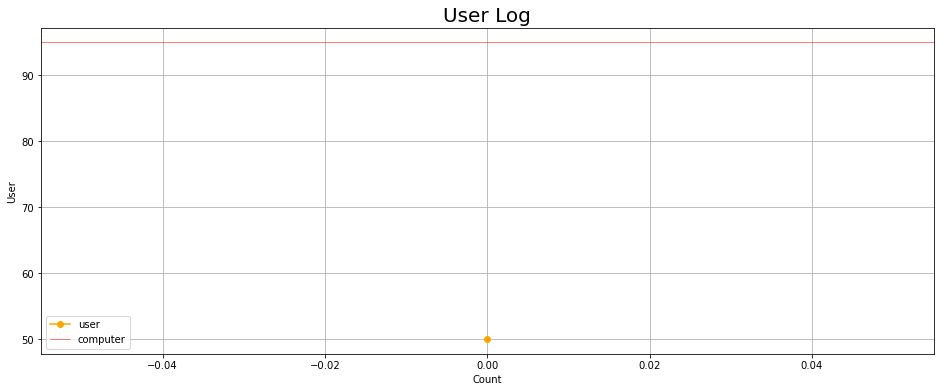

In [8]:
# 코드를 실행하세요.
import matplotlib.pyplot as plt
plt.figure(figsize = (16,6))
plt.plot(range(len(user_log)), user_log, label = 'user', marker = 'o', c = 'orange')
plt.axhline(computer, c = 'red', lw = 0.5, label = 'computer')
plt.legend()
plt.grid()
plt.xlabel('Count')
plt.ylabel('User')
plt.title('User Log', fontsize = 20)
plt.show()

<br/>
<br/>
<br/>
<br/>

## Q4) 데이터 분석
- 아래의 데이터를 data에 저장하세요.
- 나이 정보에서 "nan"은 결측치를 의미

|성별|나이|탑승가족수|탑승클래스|탑승요금|생존여부|
|---|---|---|---|---|---|
|female	|48.0	|0	|First	|25.9292	|1|
|male	|nan	|0	|Third	|7.8958	|0|
|female	|17.0	|0	|Second	|10.5000	|1|
|female	|nan	|0	|Third	|8.1375	|0|
|female	|7.0	|2	|Second	|26.2500	|1|
|male	|21.0	|0	|Third	|7.8542	|0|
|male	|36.5	|2	|Second	|26.0000	|0|
|female	|35.0	|1	|First	|53.1000	|1|
|male	|28.0	|1	|First	|82.1708	|0|
|female	|nan	|1	|Third	|15.5000	|1|
|male	|25.0	|0	|Third	|7.8958	|0|
|female	|26.0	|0	|Third	|7.9250	|1|
|male	|54.0	|0	|First	|51.8625	|0|
|male	|nan	|0	|Second	|13.0000	|1|
|female	|nan	|0	|Third	|7.7500	|1|
|male	|28.0	|0	|First	|26.5500	|1|
|male	|10.0	|5	|Third	|27.9000	|0|
|male	|24.0	|1	|Third	|16.1000	|0|
|male	|36.0	|0	|Third	|7.8958	|0|
|female	|24.0	|5	|Second	|18.7500	|1|

<br/>
<br/>

### 데이터 로드

- 직접 작성

In [9]:
# 코드를 실행하세요.
data = \
[['female', 48.0, 0, 'First', 25.9292, 1],
 ['male', 'nan', 0, 'Third', 7.8958, 0],
 ['female', 17.0, 0, 'Second', 10.5, 1],
 ['female', 'nan', 0, 'Third', 8.1375, 0],
 ['female', 7.0, 2, 'Second', 26.25, 1],
 ['male', 21.0, 0, 'Third', 7.8542, 0],
 ['male', 36.5, 2, 'Second', 26.0, 0],
 ['female', 35.0, 1, 'First', 53.1, 1],
 ['male', 28.0, 1, 'First', 82.1708, 0],
 ['female', 'nan', 1, 'Third', 15.5, 1],
 ['male', 25.0, 0, 'Third', 7.8958, 0],
 ['female', 26.0, 0, 'Third', 7.925, 1],
 ['male', 54.0, 0, 'First', 51.8625, 0],
 ['male', 'nan', 0, 'Second', 13.0, 1],
 ['female', 'nan', 0, 'Third', 7.75, 1],
 ['male', 28.0, 0, 'First', 26.55, 1],
 ['male', 10.0, 5, 'Third', 27.9, 0],
 ['male', 24.0, 1, 'Third', 16.1, 0],
 ['male', 36.0, 0, 'Third', 7.8958, 0],
 ['female', 24.0, 5, 'Second', 18.75, 1]]
data

[['female', 48.0, 0, 'First', 25.9292, 1],
 ['male', 'nan', 0, 'Third', 7.8958, 0],
 ['female', 17.0, 0, 'Second', 10.5, 1],
 ['female', 'nan', 0, 'Third', 8.1375, 0],
 ['female', 7.0, 2, 'Second', 26.25, 1],
 ['male', 21.0, 0, 'Third', 7.8542, 0],
 ['male', 36.5, 2, 'Second', 26.0, 0],
 ['female', 35.0, 1, 'First', 53.1, 1],
 ['male', 28.0, 1, 'First', 82.1708, 0],
 ['female', 'nan', 1, 'Third', 15.5, 1],
 ['male', 25.0, 0, 'Third', 7.8958, 0],
 ['female', 26.0, 0, 'Third', 7.925, 1],
 ['male', 54.0, 0, 'First', 51.8625, 0],
 ['male', 'nan', 0, 'Second', 13.0, 1],
 ['female', 'nan', 0, 'Third', 7.75, 1],
 ['male', 28.0, 0, 'First', 26.55, 1],
 ['male', 10.0, 5, 'Third', 27.9, 0],
 ['male', 24.0, 1, 'Third', 16.1, 0],
 ['male', 36.0, 0, 'Third', 7.8958, 0],
 ['female', 24.0, 5, 'Second', 18.75, 1]]

<br/>
<br/>

- 파일에서 읽기
    - `dataset` 폴더의 `titanic.csv` 파일을 읽어서 위와 같은 형식으로 data에 저장하세요. (`encoding = 'utf-8'`)
    - 나이, 탑승가족수, 생존여부는 **정수**, 탑승요금은 **실수**로 저장하세요.
    - 나이의 `nan`는 결측치를 의미

In [10]:
data = []

# 파일 읽기
f = open('../dataset/titanic.csv', 'r', encoding = 'utf-8')
lines = f.readlines()
f.close()

# 리스트로 변환











data

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/titanic.csv'

<br/>
<br/>

### 속성 조회

In [ ]:
# 데이터의 개수와 특성의 개수를 구하세요.
cnt = 
feature = 

print(f'데이터 : {cnt}개')
print(f'특성   : {feature}개')

<br/>
<br/>

### 데이터 선택

In [ ]:
# 3, 10, 12번 데이터를 선택하세요.
selected = []






        
selected

In [ ]:
# 슬라이싱을 이용하여 5 ~ 15 번 데이터를 선택하세요.


In [ ]:
# 5 ~ 15 번 데이터의 성별, 나이, 생존여부를 선택하세요.
selected = data[5:16]








        
selected

In [ ]:
# 남성 데이터를 선택하세요.
selected = []








        
selected

<br/>
<br/>

### 빈도수 구하기

In [ ]:
# 성별 빈도수를 구하세요.
male = 0
female = 0

for i in range(len(data)) :
    if data[i][0] == 'male' : 
        male += 1
    else : 
        female += 1
        
print(f'male   : {male}')
print(f'female : {female}')

In [ ]:
# 탑승클래스 빈도수를 구하세요.
first = 0
second = 0
third = 0

for i in range(len(data)) :
    if data[i][3] == 'First' : 
        first += 1
    elif data[i][3] == 'Second' : 
        second += 1
    else :
        third += 1
        
print(f'first  : {first}')
print(f'second : {second}')
print(f'third  : {third}')

<br/>
<br/>

### 통계

In [ ]:
# 탑승요금 평균을 구하세요.









In [ ]:
# 평균 나이를 구하세요.








In [ ]:
# 생존율을 구하세요.








<br/>
<br/>

### 결측치 처리

In [ ]:
# 나이 데이터의 결측치 개수를 구하세요.
cnt = 0

for i in range(len(data)) :
    if data[i][1] == 'nan' :
        cnt += 1
        
print(cnt)

In [ ]:
# 평균으로 결측치를 채우세요.

# 데이터 복사 (그대로 실행)
import copy
data2 = copy.deepcopy(data)

# 평균 나이를 avg에 저장하세요. (이전 문제)
total = 0
cnt = 0

for i in range(len(data)) :
    if data[i][1] != 'nan' :
        total += data[i][1]
        cnt += 1
        
avg = round(total / cnt, 1)

# data2의 결측치를 avg로 대체하세요.

for i in range(len(data2)) :
    if data2[i][1] == 'nan' :
        data2[i][1] = avg
        
data2

In [ ]:
# 결측치가 존재하는 데이터를 제거하세요.
idx = [] # 결측치가 존재하는 데이터의 인덱스

for i in range(len(data)) :
    if data[i][1] == 'nan' :
        idx.append(i)
        
print(idx)

# idx의 인덱스 제거
for i in idx[::-1] :
    data.pop(i)

data

<br/>
<br/>

### 그룹화

In [ ]:
# 남성, 여성 별 생존율을 구하세요.
male_total = 0
male_cnt = 0
female_total = 0
female_cnt = 0

for i in range(len(data)) :
    if data[i][0] == 'male' :
        male_total += data[i][-1]
        male_cnt += 1
    else :
        female_total += data[i][-1]
        female_cnt += 1
    
print(f'남성 생존율 : {100*(male_total / male_cnt):.2f} %')
print(f'여성 생존율 : {100*(female_total / female_cnt):.2f} %')

In [ ]:
# 탑승클래스 별 생존율을 구하세요.
first_total = 0
first_cnt = 0
second_total = 0
second_cnt = 0
third_total = 0
third_cnt = 0










    
print(f'1등석 탑승자 생존율 : {100*(first_total / first_cnt):.2f} %')
print(f'2등석 탑승자 생존율 : {100*(second_total / second_cnt):.2f} %')
print(f'3등석 탑승자 생존율 : {100*(third_total / third_cnt):.2f} %')